In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/parsed_logs_rad.csv")

In [3]:
df[df["hostname"] == "carolp20003"]

,start_dt,config,ecc,hostname,logfile,it,ker_time,acc_time,ker_err,acc_err,sdc,critical_sdc,evil_sdc,benign_sdc,batch_size
1257,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,4502,0.034874,0.000000,8,3016,1,0,0,0,128
1258,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,2,0.041432,0.000000,5,5,1,0,0,0,128
1259,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,3,0.038514,0.000000,1,6,1,0,0,0,128
1260,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,5,0.038118,0.000000,7,13,1,0,0,0,128
1261,2022-12-14 05:19:22,c10_res44_test_02_relu6-bn,OFF,carolp20003,2022_12_14_05_19_22_c10_res44_test_02_relu6-bn...,8,0.038179,0.000000,3,16,1,0,0,0,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41277,2022-12-11 18:36:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_11_18_36_41_c10_res44_test_01_bn-relu_...,7,0.038149,0.000000,5,56,1,0,0,0,128
41278,2022-12-11 18:36:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_11_18_36_41_c10_res44_test_01_bn-relu_...,9,0.038110,0.000000,7,63,1,0,0,0,128
41279,2022-12-11 18:36:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_11_18_36_41_c10_res44_test_01_bn-relu_...,10,0.038240,1.043624,7,70,1,0,0,0,128
41280,2022-12-10 19:51:41,c10_res44_test_01_bn-relu_base,OFF,carolp20003,2022_12_10_19_51_41_c10_res44_test_01_bn-relu_...,1,0.156552,0.000000,10,10,1,0,0,0,128


In [4]:
configs = dict(
    # Baseline C100
    BaseC100="c100_res44_test_01_bn-relu_base.yaml",
    # "c100_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C100
    OrderInvC100="c100_res44_test_02_relu6-bn.yaml",
    # "c100_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C100="c100_res44_test_02_bn-relu6_base.yaml",
    BnRelu6C100="c100_res44_test_02_bn-relu6.yaml",
    # Order inversion + nan filter + Relu6
    OrderINanRelu6C100="c100_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C100
    GeluNanC100="c100_res44_test_02_gelu6_nans.yaml",

    # Baseline C10
    BaseC10="c10_res44_test_01_bn-relu_base.yaml",
    # "c10_res44_test_02_bn-relu6.yaml",
    BnRelu6C10="c10_res44_test_02_bn-relu6.yaml",
    # Order inversion with relu6 C10
    OrderInvC10="c10_res44_test_02_relu6-bn.yaml",
    # "c10_res44_test_02_bn-relu6_base.yaml",
    BaseBnRelu6C10="c10_res44_test_02_bn-relu6_base.yaml",
    OrderINanRelu6C10="c10_res44_test_02_relu6-bn_nanfilter.yaml",
    # Gelu and nan C10
    GeluNanC10="c10_res44_test_02_gelu6_nans.yaml",

    MobileNetC100="cifar100_mobilenetv2_x1_4.yaml",
    MobileNetC10="cifar10_mobilenetv2_x1_4.yaml",

    Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    # Resnet50ImagenetBase="resnet50_imagenet1k_v2_base",
    DeepLabV3="deeplabv3_resnet50_base",
    ViTPatch16_224="vit_base_patch16_224",
    ViTPatchSam32_224="vit_base_patch32_224_sam",
    ViTPatch32_224="vit_base_patch32_384",
)
configs_inv = {v.replace(".yaml", ""): k for k, v in configs.items()}

In [5]:
configs_df = pd.DataFrame([configs]).T.reset_index().rename(columns={0: "YAML", "index": "config"})

In [6]:
configs_df

,config,YAML
0,BaseC100,c100_res44_test_01_bn-relu_base.yaml
1,OrderInvC100,c100_res44_test_02_relu6-bn.yaml
2,BaseBnRelu6C100,c100_res44_test_02_bn-relu6_base.yaml
3,BnRelu6C100,c100_res44_test_02_bn-relu6.yaml
4,OrderINanRelu6C100,c100_res44_test_02_relu6-bn_nanfilter.yaml
5,GeluNanC100,c100_res44_test_02_gelu6_nans.yaml
6,BaseC10,c10_res44_test_01_bn-relu_base.yaml
7,BnRelu6C10,c10_res44_test_02_bn-relu6.yaml
8,OrderInvC10,c10_res44_test_02_relu6-bn.yaml
9,BaseBnRelu6C10,c10_res44_test_02_bn-relu6_base.yaml


In [7]:
df["config"] = df["config"].apply(lambda x: configs_inv[x])

In [8]:
df["count"] = 1

In [9]:
to_save = df.groupby(["hostname", "config", "ecc"]).sum()

In [10]:
to_save

it     ker_time      acc_time  \
hostname    config               ecc                                         
carola20001 BaseC100             OFF     429533     8.467331   3466.376501   
                                 ON      262490     1.252850   4557.642749   
carolm20004 Resnet50ImagenetBase OFF       6142    60.433988   1854.429548   
            ViTPatch16_224       OFF       1397  1057.161100   3400.316663   
            ViTPatch32_224       OFF       1586   803.016960   1459.951455   
            ViTPatchSam32_224    OFF      12962   220.615607   1895.187901   
carolp20002 BaseBnRelu6C10       OFF    1367561    13.136374   9732.987719   
            BaseBnRelu6C100      OFF   14381181   160.530453  26095.092605   
            BaseC10              OFF     315910     0.867422    418.567306   
            BaseC100             OFF    3853800    58.007232  18513.751907   
            BnRelu6C100          OFF  153295987   985.377824  21765.705706   
            GeluNanC100          OFF     684513    82.153229   4138.099238   
            OrderINanRelu6C100   OFF    6968023   118.668884  28741.596878   
            OrderInvC100         OFF    4197921   120.714380   6171.406588   
carolp20003 BaseBnRelu6C10       OFF    1062124    18.912505  13609.829234   
            BaseC10              OFF   10518719   328.480168  13168.168211   
            BnRelu6C10           OFF   75519967   246.053634   3830.596582   
            DeepLabV3            OFF        533   411.133467   1056.131899   
            GeluNanC10           OFF   43597589   332.959881   4993.979719   
            OrderINanRelu6C10    OFF     739228     6.600515   8366.615890   
            OrderInvC10          OFF    7564454   404.898822   1432.586634   

                                       ker_err      acc_err    sdc  \
hostname    config               ecc                                 
carola20001 BaseC100             OFF    101193      1565798    433   
                                 ON      38974        41566     55   
carolm20004 Resnet50ImagenetBase OFF     91682       146782    105   
            ViTPatch16_224       OFF    136474       356576    197   
            ViTPatch32_224       OFF     68966       332224    206   
            ViTPatchSam32_224    OFF     43609       187353    261   
carolp20002 BaseBnRelu6C10       OFF     20292        86597    337   
            BaseBnRelu6C100      OFF   1359937     60367214   2130   
            BaseC10              OFF       279         4464     31   
            BaseC100             OFF    363524     11251915   1839   
            BnRelu6C100          OFF  60505192  30085945543  23612   
            GeluNanC100          OFF   1866175      9516325   1732   
            OrderINanRelu6C100   OFF   1692291     57767586   2683   
            OrderInvC100         OFF   1080338     36684387   1961   
carolp20003 BaseBnRelu6C10       OFF    403260      9709744    476   
            BaseC10              OFF    273075     22226880   8839   
            BnRelu6C10           OFF     56648     48254300   7878   
            DeepLabV3            OFF      2320         3776    145   
            GeluNanC10           OFF     79355     26414410   9627   
            OrderINanRelu6C10    OFF      4964        27723    101   
            OrderInvC10          OFF     46508      7620172  12959   

                                      critical_sdc  evil_sdc  benign_sdc  \
hostname    config               ecc                                       
carola20001 BaseC100             OFF            64        36          28   
                                 ON            109        41          68   
carolm20004 Resnet50ImagenetBase OFF            32         9          23   
            ViTPatch16_224       OFF           229        18         211   
            ViTPatch32_224       OFF             9         2           7   
            ViTPatchSam32_224    OFF           135        31         104   
carolp20002 BaseBnRelu6C10     

In [11]:
sdc_rate = to_save[["acc_time", "sdc", "critical_sdc"]].copy()
sdc_rate["sdc_rate"] = sdc_rate["sdc"] / sdc_rate["acc_time"]
sdc_rate["critical_sdc_rate"] = sdc_rate["critical_sdc"] / sdc_rate["acc_time"]

In [12]:
sdc_rate

acc_time    sdc  critical_sdc  \
hostname    config               ecc                                      
carola20001 BaseC100             OFF   3466.376501    433            64   
                                 ON    4557.642749     55           109   
carolm20004 Resnet50ImagenetBase OFF   1854.429548    105            32   
            ViTPatch16_224       OFF   3400.316663    197           229   
            ViTPatch32_224       OFF   1459.951455    206             9   
            ViTPatchSam32_224    OFF   1895.187901    261           135   
carolp20002 BaseBnRelu6C10       OFF   9732.987719    337           121   
            BaseBnRelu6C100      OFF  26095.092605   2130           205   
            BaseC10              OFF    418.567306     31             0   
            BaseC100             OFF  18513.751907   1839            82   
            BnRelu6C100          OFF  21765.705706  23612            97   
            GeluNanC100          OFF   4138.099238   1732            13   
            OrderINanRelu6C100   OFF  28741.596878   2683           176   
            OrderInvC100         OFF   6171.406588   1961            37   
carolp20003 BaseBnRelu6C10       OFF  13609.829234    476          8944   
            BaseC10              OFF  13168.168211   8839          1757   
            BnRelu6C10           OFF   3830.596582   7878             1   
            DeepLabV3            OFF   1056.131899    145             0   
            GeluNanC10           OFF   4993.979719   9627             6   
            OrderINanRelu6C10    OFF   8366.615890    101           135   
            OrderInvC10          OFF   1432.586634  12959             2   

                                      sdc_rate  critical_sdc_rate  
hostname    config               ecc                               
carola20001 BaseC100             OFF  0.124914           0.018463  
                                 ON   0.012068           0.023916  
carolm20004 Resnet50ImagenetBase OFF  0.056621           0.017256  
            ViTPatch16_224       OFF  0.057936           0.067347  
            ViTPatch32_224       OFF  0.141101           0.006165  
            ViTPatchSam32_224    OFF  0.137717           0.071233  
carolp20002 BaseBnRelu6C10       OFF  0.034625           0.012432  
            BaseBnRelu6C100      OFF  0.081625           0.007856  
            BaseC10              OFF  0.074062           0.000000  
            BaseC100             OFF  0.099332           0.004429  
            BnRelu6C100          OFF  1.084826           0.004457  
            GeluNanC100          OFF  0.418550           0.003142  
            OrderINanRelu6C100   OFF  0.093349           0.006124  
            OrderInvC100         OFF  0.317756           0.005995  
carolp20003 BaseBnRelu6C10       OFF  0.034975           0.657172  
            BaseC10              OFF  0.671240           0.133428  
            BnRelu6C10           OFF  2.056599           0.000261  
            DeepLabV3            OFF  0.137293           0.000000  
            GeluNanC10           OFF  1.927721           0.001201  
            OrderINanRelu6C10    OFF  0.012072           0.016136  
            OrderInvC10          OFF  9.045875           0.001396

<AxesSubplot: ylabel='config,ecc'>

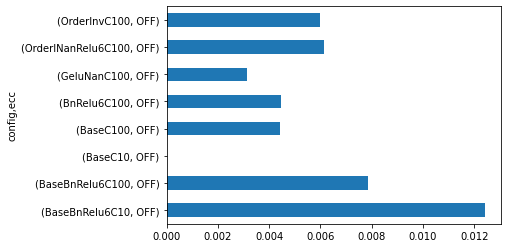

In [13]:
sdc_rate.loc["carolp20002"]["critical_sdc_rate"].plot.barh()